# **DCGAN (*Deep Convolutional Generative Adversarial Networks*)**

# Introducción

Las redes generativas adversarias (GANs) son un tipo de red neuronal que fueron propuestas por primera vez por **Ian Goodfellow en 2014**, aunque no fue hasta hace unos pocos años que su utilización se empezó a popularizar, dados los problemas que este tipo de modelos mostraban durante el entrenamiento de los mismos.

Este tipo de redes, a diferencia de otros modelos de Deep Learning, están compuestos por dos redes neuronales:

- **Generador**
    
    Esta red neuronal recibe como input un vector de números aleatorios de un tamaño concreto (típicamente sigue una distribución gaussiana), y genera como resultado una imagen.


- **Discriminador**

    El discriminador es una red neuronal convolucional típica, que en este caso trata de clasificar imágenes en dos categorías (es decir, lleva a cabo una clasificación binaria):
    
    - **Imágenes reales**
    - **Imágenes fake** (aquellas generadas por el generador)

Con estas dos componentes, las arquitectura de las DCGANS tiene una estructura similar a lo que se muestra en la siguiente imagen:

<p align="center">
    <img src="https://editor.analyticsvidhya.com/uploads/754471a.png" width="800" height="400" />
</p>

[Deep Convolutional Generative Adversarial Network (DCGAN) for Beginners, Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/07/deep-convolutional-generative-adversarial-network-dcgan-for-beginners/)

Como se puede apreciar en la imagen anterior, se tienen dos conjuntos de imágenes con las cuales se entrena el discriminador. Por un lado, un conjunto de imágenes reales, y por el otro, imágenes generadas por el generador de forma iterativa según este va aprendiendo a generar imágenes cada vez más realistas.

Durante el proceso de entrenamiento de una DCGAN, el generador intenta generar imágenes lo más parecidas posibles a la realidad con el objetivo de engañar al discriminador, mientras que este último intenta ser capaz de clasificar correctamente las imágenes reales y las imágenes fake.

Más concretamente, el **proceso de entrenamiento** de una DCGAN se puede resumir en los siguientes pasos:

1. En primer lugar se selecciona un subconjunto o mini-batch de imágenes reales de forma aleatoria del dataset de entrenamiento (es decir, del conjunto de imágenes reales disponible).

2. Se genera un subconjunto o mini-batch del mismo tamaño, pero en este caso conformado por imágenes fake generadas por el generador (inicialmente el generador no ha sido entrenado por lo que generará imágenes muy poco realistas).

3. Ambos subconjuntos de datos son proporcionados al discriminador, y este clasifica las imágenes en dos categorías: imágenes reales e imágenes fake.

4. Se calculan los errores de clasificación del discriminador, y mediante el algoritmo de backpropagation se actualizan los parámetros del discriminador, de forma que en cada iteración mejore su capacidad de clasificar correctamente las imágenes reales y las imágenes fake.

5. Respecto al generador, este también actualiza sus parámetros, pero éste solo tiene en cuenta el error de clasificación del discriminador para las imágenes fake (es decir, como de bien o mal lo ha hecho el discriminador con las imágenes que el generador había generado). 

Es importante destacar que **mientras que el objetivo del discriminador es minimizar su función de pérdida, el objetivo del generador es maximizarla**.

El modelo coverge cuando el generador produce imágenes perfectas, de forma que el discriminador no es capaz de distinguir entre ambas (es decir, este tiene una precisión del 50%). Sin embargo, **no es sencillo llegar a la convergencia**, ya que es relativamente sencillo que el discriminador se vuelva mucho mejor que el generador, ya que su tarea (clasificar imágenes reales y fake) es mucho más sencilla que la del generador (generar imágenes lo más parecidas posibles a la realidad a partir de ruido aleatorio). Por ello, es necesario limitar la capacidad del discriminador, motivo por el cual se suele incluir valores muy altos del dropout en este (de forma que le resulte muy complicado aprender a clasificar correctamente las imágenes reales y las fake), entre otros aspectos.

Un ejemplo de cómo una DCGAN puede no llegar a la convergencia es lo que se conoce como ***mode collapse***. Esto sucede cuando las imágenes que genera el generador se vuelven menos variables, sino que se centra en una clase en concreto. Por ejemplo, en el dataset de MNIST, podría ocurrir que el generador engañara al discriminador en mayor medida cuando genera imágenes de ochos. Esto hará que el generador tienda cada vez más y más a generar imágenes de ochos, ya que es lo que mejor sabe hacer, y por tanto como puede engañar al discriminador. Sin embargo, esto hará que el generador cada vez se olvide más de hacer imágenes del resto de clases, y al mismo tiempo que el discriminador cada vez vea más ochos, de forma que se irá olvidando de cómo discriminar las imágenes del resto de clases. Pasado un tiempo el discriminador será capaz de clasificar correctamente las imágenes de ochos, lo que hará que el generador deba generar imágenes de alguna otra clase. Este ciclo podría repetirse sucesivamente para otras clases, haciendo que el modelo no llegué a converger.

**Fuentes:**

- [Python Deep Learning. Introducción práctica con Keras y TensorFlow 2. Jordi Torres.](https://www.amazon.es/Python-Deep-Learning-Introducci%C3%B3n-TensorFlow/dp/8426728286/ref=sr_1_1?keywords=python+deep+learning+jordi+torres&qid=1680454981&sprefix=python+deep+%2Caps%2C178&sr=8-1)
- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition. Aurélien Géron.](https://www.amazon.es/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=sr_1_2?keywords=hands-on+machine+learning+with+scikit-learn%2C+keras%2C+and+tensorflow&qid=1680455022&sprefix=hands+on+mac%2Caps%2C112&sr=8-2)

## Aplicaciones de las DCGANs

Las DCGANs tienen numerosas aplicaciones, entre las cuales se encuentran:

- **Data augmentation**: los modelos de Deep Learning suelen ser muy complejos, por lo que se requiere de muchos datos para entrenarlos. Sin embargo, en muchas ocasiones no se dispone de una cantidad de datos suficientes (por ejemplo esto es muy común en el sector de la medicina debido a lo sensibles que son los datos que se tratan), de forma que el uso de DCGANs puede ser una alternativa o complemento a otras técnicas como el data augmentation tradicional para aumentar el conjunto de datos de entrenamiento.

- **Sector retail**: el uso de DCGANs permitiría ser una ayuda a las marcas y diseñadores a la hora de crear nuevos productos o diseños. Por ejemplo, una marca de ropa podría utilizar una DCGAN para generar nuevas prendas de ropa, y así poder decidir cuáles de ellas son las que más les gustan y las que más se ajustan a lo que buscan.

- **Entertainment**: las DCGANs también pueden ser utilizadas para generar imágenes de personajes de videojuegos, películas, series, etc.

---

# Código

En primer lugar, importamos las librerías necesarias:

In [1]:
import os

import tensorflow as tf
import matplotlib.pyplot as plt

from src.dcgan import DCGAN

## 1. MNIST dataset

In [2]:
dcgan = DCGAN('mnist')
dcgan.train(epochs=5000, batch_size=32, save_interval=100)



MODEL SUMMARY


Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None,

c:\Users\jorge\miniconda3\envs\mldl\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(




Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              633472    
                                                                 
 batch_normalization (BatchN  (None, 6272)             25088     
 ormalization)                                                   
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      147584    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 128)      

Tras entrenar ambos modelos (generador y discriminador), procedemos a generar algunas imágenes con el generador, para comprobar como de reales son estas, de forma que podamos evaluar de forma visual la calidad del generador obtenido.

In [3]:
# Load generator model
mnist_model_path = os.path.join("models", "tf_mnist_generator.h5")
generator = tf.keras.models.load_model(mnist_model_path, compile=False)

# Generate images
noise = tf.random.normal([16, 100])
generated_images = generator(noise, training=False)

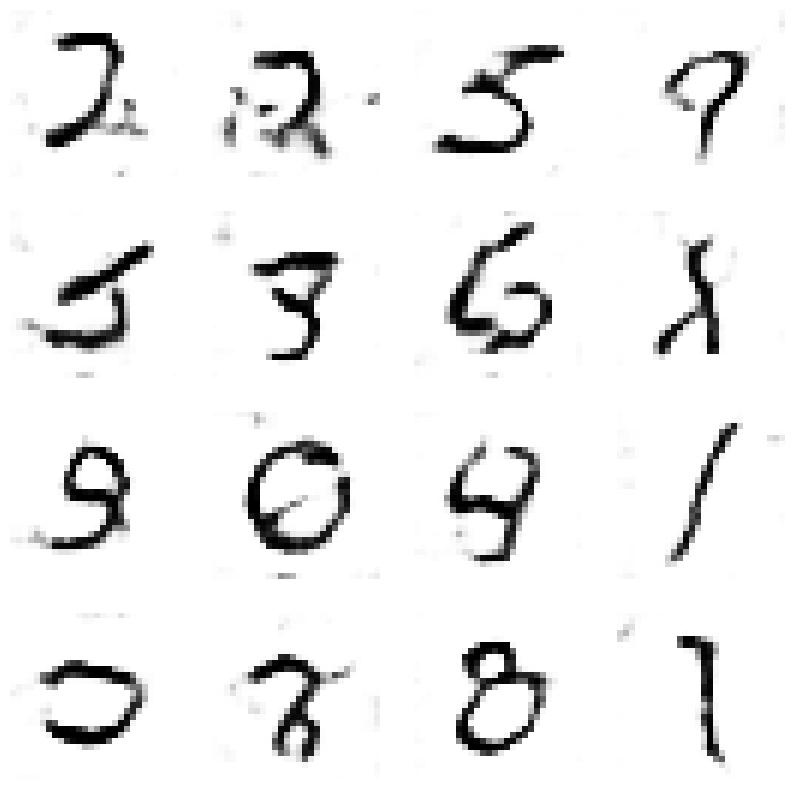

In [4]:
# Show generated images

plt.figure(figsize=(10, 10))
for i in range(generated_images.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, interpolation='nearest', cmap='gray_r')
    plt.axis('off')
plt.show()

Podemos comprobar que algunas imágenes generadas por el generador son relativamente realistas, como por ejemplo el 0 que se observa en la segunda fila y tercera columna, mientras que la imagen de la segunda fila y primera columna es bastante poco realista, y no se parece a ningún número real.

## 2. Fashion MNIST dataset

In [5]:
dcgan = DCGAN('fashion_mnist')
dcgan.train(epochs=5000, batch_size=32, save_interval=100, images_dir="images/tf_fashion_mnist")



MODEL SUMMARY


Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None,

Volvemos a cargar el modelo generado en este caso, para generar algunas imágenes con el generador, y así poder evaluar de forma visual la calidad del mismo.

In [6]:
# Load generator model
fashion_mnist_model_path = os.path.join("models", "tf_fashion_mnist_generator.h5")
generator = tf.keras.models.load_model(fashion_mnist_model_path, compile=False)

# Generate images
noise = tf.random.normal([16, 100])
generated_images = generator(noise, training=False)

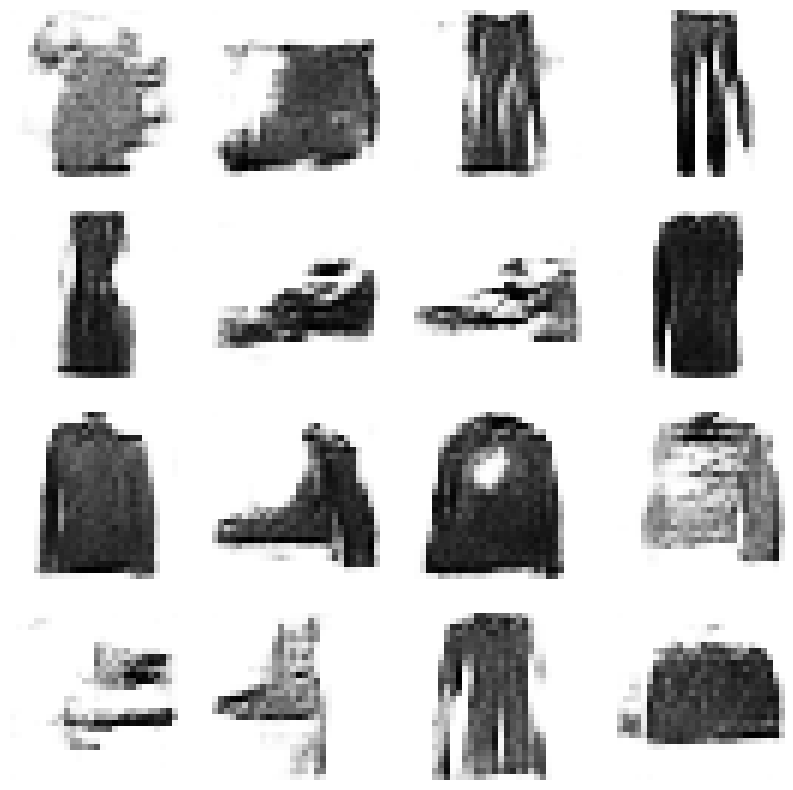

In [7]:
# Show generated images
plt.figure(figsize=(10, 10))
for i in range(generated_images.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, interpolation='nearest', cmap='gray_r')
    plt.axis('off')
plt.show()

Vemos que en este caso el generador, pese a haber sido entrenado durante el mismo número de epochs, genera peores resultados que en el caso anterior. Esto se debe a que el dataset de Fashion MNIST es más complejo que el de MNIST, y por tanto el generador no ha sido capaz de aprender a generar imágenes tan realistas como en el caso anterior.

----

<p align="left">
    <img src="https://pytorch.org/assets/images/pytorch-logo.png" width="250" height="250" />
</p>

# **Ejecutando el código usando la librería Pytorch**

Se ha desarrollado un código equivalente al mostrado en clase con la librería [TensorFlow](https://www.tensorflow.org/api_docs), pero en este caso haciendo uso de la librería [PyTorch](https://pytorch.org/docs/stable/index.html). De esta forma, se pueden comparar las diferencias en cuanto a la implementación de los modelos en ambas librerías.

Si bien los métodos utilizados en la clase son los mismos que en la clase de TensorFlow proporcionada, ha sido realizar numerosos cambios para que el código pudiera ser ejecutado en PyTorch. Se puede observar como PyTorch permite una implementación a más bajo nivel, ofreciendo una mayor capacidad de control al usuario sobre las implementaciones de los modelos. Sin embargo, esto puede hacer que la curva de aprendizaje sea más elevada que en el caso de TensorFlow.

Adicionalmente, se ha modificado levemente la arquitectura de ambos modelos (generador y discriminador), para así comprobar si se observa alguna diferencia significativa con respecto al modelo implementado en TensorFlow.

In [8]:
import torch

from src.dcgan_torch import DCGAN_torch

In [9]:
# Set the device to GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 1. MNIST dataset

In [10]:
dcgan = DCGAN_torch(dataset='mnist', data_dir='data')
dcgan.train(epochs=5, batch_size=32, save_interval=100, images_dir='images/pytorch_mnist', models_dir='models')

100%|██████████| 9912422/9912422 [00:00<00:00, 41095307.10it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 9700167.67it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 35077736.23it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



Sequential(
  (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (1): LeakyReLU(negative_slope=0.2, inplace=True)
  (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): LeakyReLU(negative_slope=0.2, inplace=True)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): LeakyReLU(negative_slope=0.2, inplace=True)
  (8): Conv2d(128, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (9): Sigmoid()
)


Sequential(
  (0): ConvTranspose2d(100, 128, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): ConvTranspose2d(128, 64, kern

  0%|          | 0/5 [00:00<?, ?it/s]

[Discriminator loss: 0.1340] - [Generator loss: 3.4718]: 100%|██████████| 5/5 [31:25<00:00, 377.06s/epoch] 


In [11]:
# Load generator model
mnist_model_path = os.path.join("models", "pytorch_mnist_generator.pt")
generator = torch.load(mnist_model_path)
generator.eval()

# Generate images
noise = torch.randn(16, 100, 1, 1, device=device)
generated_images = generator(noise).detach()
generated_images = 0.5 * generated_images + 0.5

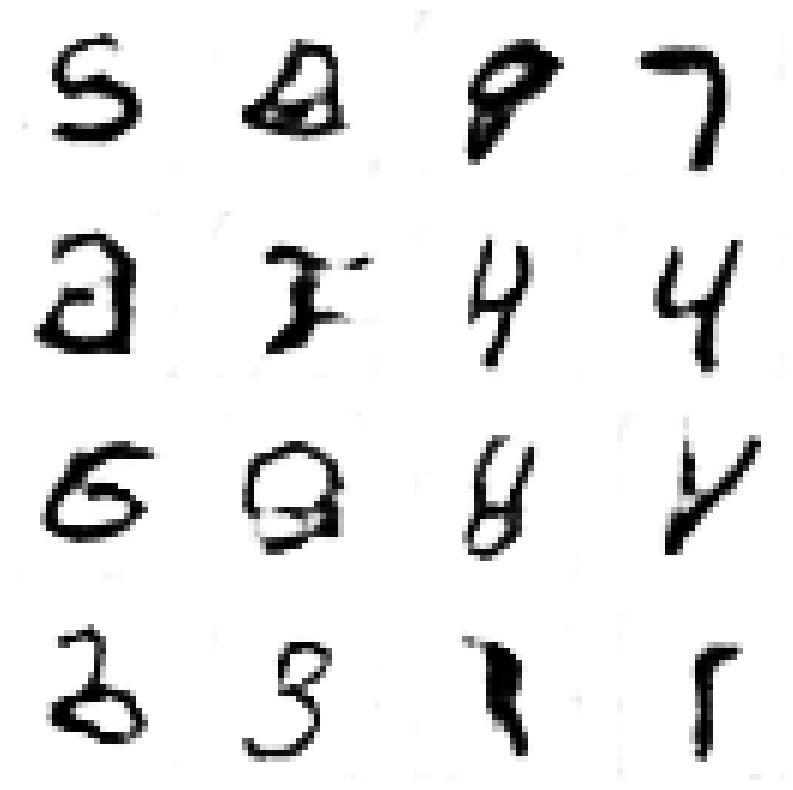

In [12]:
# Show generated images
plt.figure(figsize=(10, 10))
for i in range(generated_images.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(generated_images.detach().numpy()[i, 0, :, :], interpolation='nearest', cmap='gray_r')
    plt.axis('off')
plt.show()

# 2. Fashion MNIST dataset

In [13]:
dcgan = DCGAN_torch(dataset='fashion_mnist', data_dir='data')
dcgan.train(epochs=5, batch_size=32, save_interval=100, images_dir='images/pytorch_fashion_mnist', models_dir='models')

100%|██████████| 26421880/26421880 [00:02<00:00, 9098415.75it/s] 


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 1234627.68it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3756436.90it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]


Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



Sequential(
  (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (1): LeakyReLU(negative_slope=0.2, inplace=True)
  (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): LeakyReLU(negative_slope=0.2, inplace=True)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): LeakyReLU(negative_slope=0.2, inplace=True)
  (8): Conv2d(128, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (9): Sigmoid()
)


Sequential(
  (0): ConvTranspose2d(100, 128, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): ConvTranspose2d

  0%|          | 0/5 [00:00<?, ?it/s]

[Discriminator loss: 0.4450] - [Generator loss: 2.2423]: 100%|██████████| 5/5 [29:07<00:00, 349.46s/epoch]


In [14]:
# Load generator model
fashion_mnist_model_path = os.path.join("models", "pytorch_fashion_mnist_generator.pt")
generator = torch.load(fashion_mnist_model_path)
generator.eval()

# Generate images
noise = torch.randn(16, 100, 1, 1, device=device)
generated_images = generator(noise).detach()
generated_images = 0.5 * generated_images + 0.5

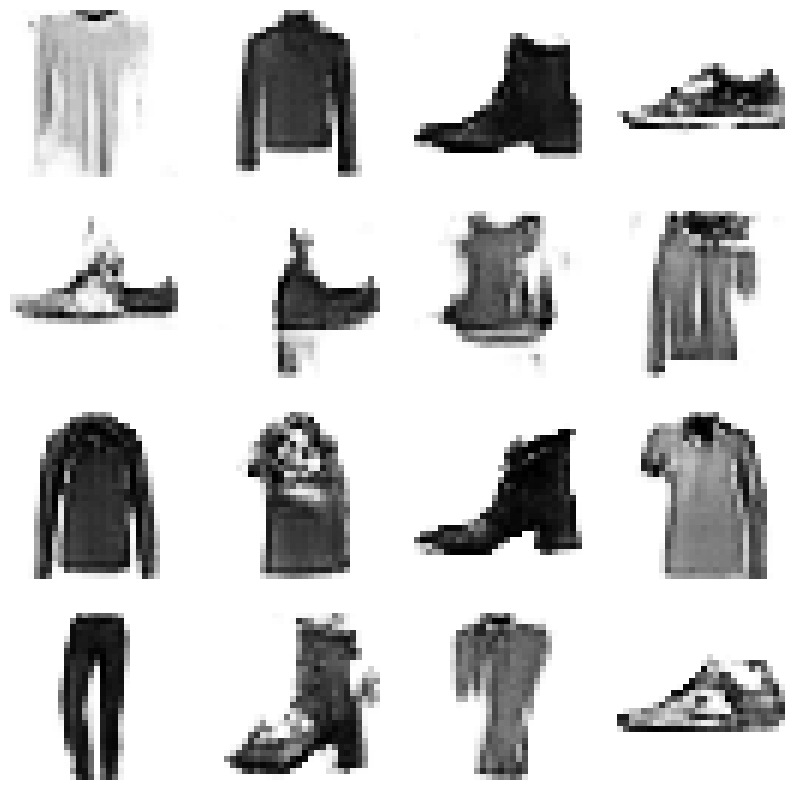

In [15]:
# Show generated images
plt.figure(figsize=(10, 10))
for i in range(generated_images.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(generated_images.detach().numpy()[i, 0, :, :], interpolation='nearest', cmap='gray_r')
    plt.axis('off')
plt.show()